# Continuous benchmarks
To use our model on continuous setups, we recommend using the interface in `pfns4bo/pfn_bo_bayesmark.py`.
This is a standard BayesMark interface.
The calls to this interface used in our BayesMark experiments are given in `pfns4bo/config.json`.

In [1]:
# copied from `pfns4bo/config.json`
config = {
            "pfn_file" : "final_models/model_hebo_morebudget_9_unused_features_3.pt",
            "minimize": 1,
            "fit_encoder_from_step": None,
            "sample_only_valid": 1,
            "pre_sample_size": 1000,
            "num_candidates": 10,
            "max_initial_design": 1,
            "fixed_initial_guess": 0.0
        }

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

{'n_estimators': {'type': 'int', 'space': 'linear', 'range': (10, 100)}, 'learning_rate': {'type': 'real', 'space': 'log', 'range': (0.0001, 10.0)}}
X={'learning_rate': 9.999999999999991e-05, 'n_estimators': 10}, y=[17.329992586524547]
transformed X=[-9.210340371976184, 10]
temp_X=tensor([[0., 0.]]), temp_y=tensor([-17.3300])


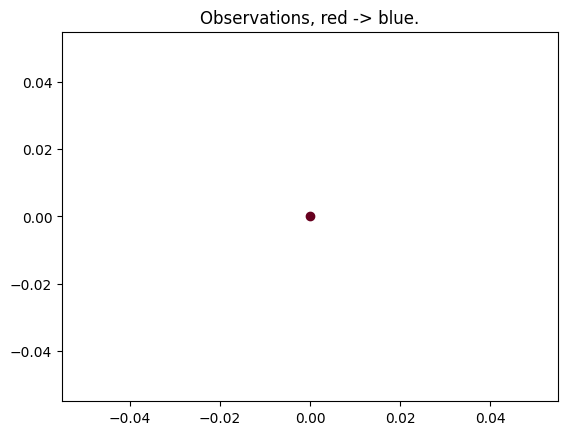

y_given=tensor([0.])


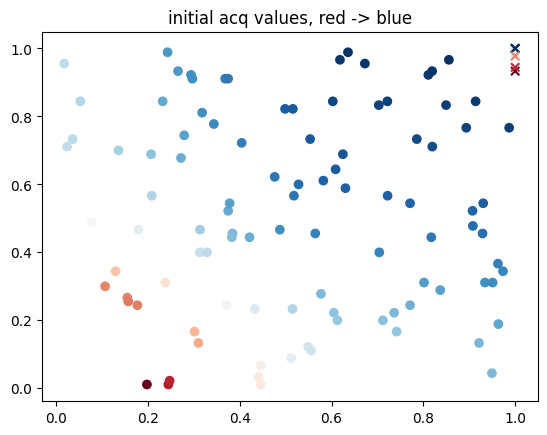

New point at pos 0: ({'learning_rate': 10.00000000000001, 'n_estimators': 100}, tensor([1., 1.]))
X={'learning_rate': 10.00000000000001, 'n_estimators': 100}, y=[540.749307409366]
transformed X=[2.302585092994047, 100]
temp_X=tensor([[0., 0.],
        [1., 1.]]), temp_y=tensor([ -17.3300, -540.7493])


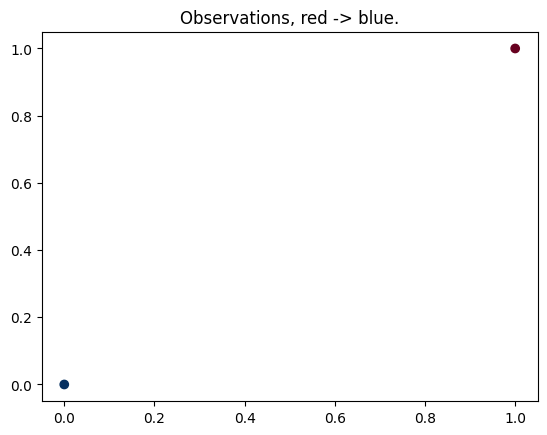

y_given=tensor([ 1., -1.])


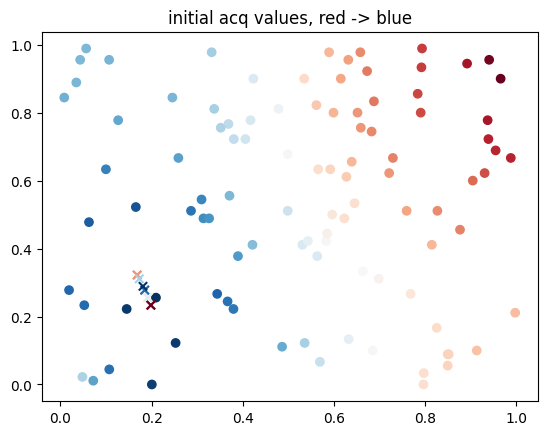

New point at pos 0: ({'learning_rate': 0.0008044517112346371, 'n_estimators': 36}, tensor([0.1811, 0.2889]))
X={'learning_rate': 0.0008044517112346371, 'n_estimators': 36}, y=[17.05546668774746]
transformed X=[-7.125349616658806, 36]


In [5]:
from pfns4bo.pfn_bo_bayesmark import PFNOptimizer
from bayesmark.experiment import _build_test_problem, run_study, OBJECTIVE_NAMES
import os


#function_instance = _build_test_problem(model_name='ada', dataset='breast', scorer='nll', path=None)
function_instance = _build_test_problem(model_name='ada', dataset='boston', scorer='mse', path=None)

# Setup optimizer
api_config = function_instance.get_api_config()
# check is file

opt = PFNOptimizer(api_config, verbose=True, device="cpu:0", **config)

function_evals, timing, suggest_log = run_study(
    opt, function_instance, n_calls=3, n_suggestions=1, callback=None, n_obj=len(OBJECTIVE_NAMES),
)